- p1,p2,p3,p4 데이터
- happy, disgusted, calm, sad, fear, confused, surprised, angry 수치 데이터가 있고
- emtion(target 변수)에는 p(positive),z(normal),n(negative) 정보가 있음

- 이 영상/사진(숫자로변환됨)에서 사람이 긍정/평온/부정적인 것 중 어떤 쪽에 가까운가?

In [1]:
# 내가 열 순서가 다 달라서 지금 따로따로 만들었는데, 
# 데이터를 미리 열 순서를 맞춰야할지 파이썬으로 맞출지 고민

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
# % matplotlib inline

In [3]:
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
 # 일단 데이터 합치는 거 난제 하고,, 하나 가지고 먼저 해보자

In [11]:
df_raw = pd.read_csv('C:\\Users\\SEOJIN\\Desktop\\jongp1_2021\\train_machinelearning\\train data\\text\\entire.csv', engine='python')
df_raw.head()

,HAPPY,DISGUSTED,CALM,SAD,FEAR,CONFUSED,SURPRISED,ANGRY,emotion
0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,p
1,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,p
2,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,p
3,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,p
4,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,p


In [12]:
df_raw.describe()

,HAPPY,DISGUSTED,CALM,SAD,FEAR,CONFUSED,SURPRISED,ANGRY
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,24.071893,5.905627,37.518721,20.674885,0.043734,2.682020,0.142634,2.920793
std,39.586029,19.106420,34.824771,28.934603,0.810163,9.469941,2.189316,7.867107
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,35.000000,8.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,0.000000,75.000000,25.500000,0.000000,0.000000,0.000000,2.000000
max,100.000000,97.000000,96.000000,99.620000,16.000000,76.000000,41.000000,70.000000


In [13]:
plt.rc('font',family='NanumGothic')

In [10]:
# emotion은 목표변수니까 더미를 만들 필요자체가 없네!
# df_raw = pd.get_dummies(df_raw)
# df_raw

In [19]:
# # 이렇게 하면 문제 생기려나..? 더미변수 생성해서 각각 1/0해야할까..?
# # p : 2 z : 1 n : 0
# for i in range(len(df_raw['emotion'])):
#     if df_raw['emotion'][i] == 'p':
#         df_raw['emotion'][i] = 2
#     elif df_raw['emotion'][i] == 'z':
#         df_raw['emotion'][i] = 1
#     elif df_raw['emotion'][i] == 'n':
#         df_raw['emotion'][i] = 0
# # df_raw['emotion'] = np.where(df_raw['emotion']=='p',2)
# # df_raw['emotion'] = np.where(df_raw['emotion']=='z',1)
# # df_raw['emotion'] = np.where(df_raw['emotion']=='n',0)
# df_raw.head(50)

<ipython-input-19-9a9a7f742a92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['emotion'][i] = 2
<ipython-input-19-9a9a7f742a92>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['emotion'][i] = 1
<ipython-input-19-9a9a7f742a92>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['emotion'][i] = 0


,HAPPY,DISGUSTED,CALM,SAD,FEAR,CONFUSED,SURPRISED,ANGRY,emotion
0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5,96.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
7,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [20]:
# 데이터가 적어서 교차 검증을 해야할 것 같은데,, oob_score, bootstrap이 관련이 있다?

In [10]:
# 일단 , 잘 모르겠지만 ㄱㄱ해보자

In [14]:
df_raw_y = df_raw['emotion']
df_raw_x = df_raw.drop('emotion', axis=1, inplace=False)

In [15]:
# data 7:3 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)

print('Train Data X size: {}'.format(df_train_x.shape))
print('Train Data Y size: {}'.format(df_train_y.shape))
print('Test Data X size: {}'.format(df_test_x.shape))
print('Test Data Y size: {}'.format(df_test_y.shape))

Train Data X size: (273, 8)
Train Data Y size: (273,)
Test Data X size: (118, 8)
Test Data Y size: (118,)


In [17]:
# default로 했을 때 Random Forest 모델 생성
tree_uncustomized = RandomForestClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set:{:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set:{:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set:0.875
Score on test set:0.525


In [18]:
tree_uncustomized

RandomForestClassifier(random_state=1234)

In [52]:
# n-estimator 

train_accuracy = []; test_accuracy=[]

para_n_tree = [n_tree*10 for n_tree in range(1,40)] # 개수는 그냥 마음대로? # 확인하고 싶은 만큼 보는거래

for v_n_estimators in para_n_tree:
    # n_estimators : 생성할 트리 개수
    rf = RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy

In [53]:
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.864,0.542
1,20,0.872,0.525
2,30,0.875,0.508
3,40,0.875,0.525
4,50,0.875,0.517
5,60,0.875,0.517
6,70,0.875,0.517
7,80,0.875,0.525
8,90,0.875,0.525
9,100,0.875,0.525


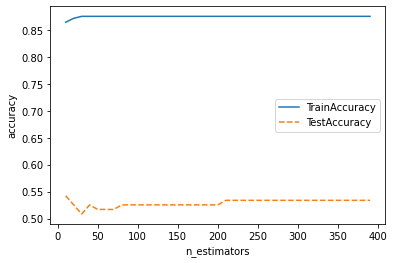

In [54]:

# 모델 정확도 그래프로 확인
plt.plot(para_n_tree, train_accuracy,linestyle='-', label='TrainAccuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label='TestAccuracy')
plt.xlabel('n_estimators');plt.ylabel('accuracy')
plt.legend()

In [55]:
oob_error=[]

para_n_tree = [n_tree*10 for n_tree in range(1,40)]

for v_n_estimators in para_n_tree:
    # n_estimators : 생성할 트리 개수
    rf = RandomForestClassifier(n_estimators=v_n_estimators, oob_score=True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)

c:\users\seojin\jupylab\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\seojin\jupylab\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


In [57]:
oob_error

[0.4578754578754579,
 0.41758241758241754,
 0.42490842490842495,
 0.43956043956043955,
 0.41025641025641024,
 0.41025641025641024,
 0.41758241758241754,
 0.4139194139194139,
 0.4065934065934066,
 0.40293040293040294,
 0.38827838827838823,
 0.39560439560439564,
 0.39560439560439564,
 0.3992673992673993,
 0.391941391941392,
 0.39560439560439564,
 0.39560439560439564,
 0.39560439560439564,
 0.39560439560439564,
 0.41025641025641024,
 0.40293040293040294,
 0.40293040293040294,
 0.40293040293040294,
 0.40293040293040294,
 0.3992673992673993,
 0.40293040293040294,
 0.40293040293040294,
 0.3992673992673993,
 0.40293040293040294,
 0.40293040293040294,
 0.4065934065934066,
 0.4065934065934066,
 0.4065934065934066,
 0.40293040293040294,
 0.4065934065934066,
 0.4065934065934066,
 0.3992673992673993,
 0.39560439560439564,
 0.3992673992673993]

Text(0, 0.5, 'oob error')

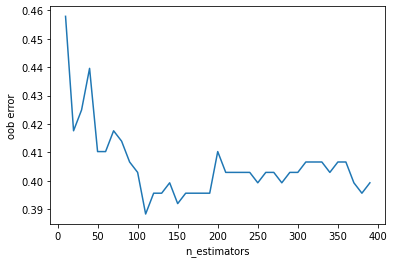

In [56]:
# 모델 정확도 그래프로 확인
plt.plot(para_n_tree, oob_error)
plt.xlabel('n_estimators');plt.ylabel('oob error')

n_estimators = 100

- 트리 개수 변경에 따른 성능 변화는 딱히 없음

In [70]:
# max-depth
# depth 조정
train_score = []; test_score=[]

para_depth = [depth for depth in range(1,20)] # 개수는 그냥 마음대로?

for v_max_depth in para_depth:
    rf = RandomForestClassifier(n_estimators = 100, max_depth = v_max_depth,random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [71]:
# 위의 모델의 성능 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.637,0.542
1,2,0.725,0.602
2,3,0.769,0.644
3,4,0.791,0.636
4,5,0.799,0.636
5,6,0.802,0.636
6,7,0.817,0.619
7,8,0.832,0.602
8,9,0.850,0.568
9,10,0.864,0.542


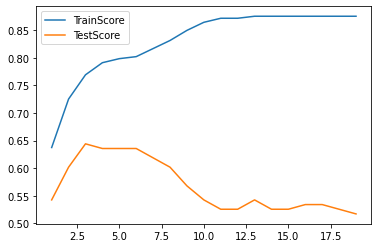

In [72]:
plt.plot(para_depth, train_score, linestyle='-', label='TrainScore')
plt.plot(para_depth, test_score, linestyle='-', label='TestScore')
plt.legend()

In [75]:
# branch 조정

train_score = []; test_score=[]

para_split = [n_split*10 for n_split in range(1,20)] # 개수는 그냥 마음대로?

for v_min_samples_split in para_split:
    tree = RandomForestClassifier(random_state=1234, max_depth=3, n_estimators=100, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [76]:
# 위의 모델의 성능 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,10,0.766,0.636
1,20,0.762,0.636
2,30,0.758,0.636
3,40,0.758,0.636
4,50,0.758,0.644
5,60,0.758,0.644
6,70,0.755,0.644
7,80,0.751,0.644
8,90,0.740,0.644
9,100,0.733,0.653


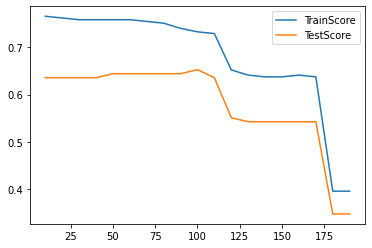

In [77]:
plt.plot(para_split, train_score, linestyle='-', label='TrainScore')
plt.plot(para_split, test_score, linestyle='-', label='TestScore')
plt.legend()

In [86]:
# leaf 노드 데이터 수 조정 
# leaf 노드가 가지는 데이터 수가 많아지면 과대적합 방지됨

train_score = []; test_score=[]

para_leaf = [n_leaf for n_leaf in range(1,30)] # 개수는 그냥 마음대로? # 확인하고 싶은 만큼 보는거래

for v_min_samples_leaf in para_leaf:
    tree = RandomForestClassifier(random_state=1234, max_depth=3, n_estimators=100, min_samples_split=100, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [87]:
# 위의 모델의 성능 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.733,0.653
1,2,0.733,0.644
2,3,0.725,0.644
3,4,0.722,0.636
4,5,0.722,0.636
5,6,0.722,0.627
6,7,0.722,0.627
7,8,0.722,0.619
8,9,0.722,0.619
9,10,0.722,0.619


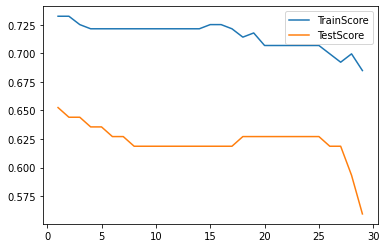

In [88]:
plt.plot(para_leaf, train_score, linestyle='-', label='TrainScore')
plt.plot(para_leaf, test_score, linestyle='-', label='TestScore')
plt.legend()

In [179]:
# 모델 선정
rf_final = RandomForestClassifier(random_state=1234, max_depth=3, n_estimators=100, min_samples_split=100)
rf_final.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=3, min_samples_split=100, random_state=1234)

In [180]:
from sklearn.metrics import confusion_matrix

In [181]:
y_pred = rf_final.predict(df_test_x)

print('Accuracy: {0:.3f}\n'.format(rf_final.score(df_test_x,df_test_y)))
print('Confusion Matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.653

Confusion Matrix: 
[[30  0 11]
 [ 2 25  8]
 [18  2 22]]


In [182]:
y_pred

array(['n', 'n', 'p', 'n', 'z', 'z', 'n', 'z', 'p', 'z', 'z', 'z', 'p',
       'z', 'z', 'p', 'p', 'n', 'p', 'n', 'p', 'z', 'n', 'z', 'n', 'n',
       'z', 'z', 'p', 'p', 'n', 'p', 'z', 'n', 'n', 'p', 'n', 'n', 'z',
       'p', 'n', 'p', 'n', 'n', 'p', 'z', 'n', 'n', 'z', 'z', 'p', 'n',
       'n', 'z', 'n', 'z', 'z', 'n', 'p', 'n', 'n', 'n', 'z', 'p', 'p',
       'z', 'n', 'n', 'n', 'z', 'z', 'z', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'z', 'n', 'z', 'z', 'n', 'z', 'z', 'p', 'z', 'n', 'n', 'z',
       'z', 'n', 'p', 'n', 'p', 'n', 'n', 'p', 'p', 'n', 'n', 'n', 'p',
       'n', 'z', 'z', 'z', 'z', 'p', 'z', 'p', 'p', 'z', 'n', 'n', 'z',
       'z'], dtype=object)

In [125]:
para_leaf = [n_leaf*5 for n_leaf in range(1,20)]
para_split = [n_split for n_split in range(1,150,5)]
para_depth = [depth for depth in range(1,15)] # 개수는 그냥 마음대로?

### gridsearchcv

In [134]:
estimator = RandomForestClassifier(n_estimators = 100, max_depth=3, random_state = 1234)

# 구하고자 하는 파라미터, 범위
#  
param_grid = {'min_samples_leaf':para_leaf}

grid_rf = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)
print('best estimator model:\n{}'.format(grid_rf.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_rf.best_params_))
print('\nbest score:\n{}'.format(grid_rf.best_score_.round(3)))

best estimator model:
RandomForestClassifier(max_depth=3, min_samples_leaf=10, random_state=1234)

best parameter:
{'min_samples_leaf': 10}

best score:
0.685


In [135]:
y_pred = grid_rf.predict(df_test_x)

print('Accuracy: {0:.3f}\n'.format(grid_rf.score(df_test_x,df_test_y)))
print('Confusion Matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.636

Confusion Matrix: 
[[29  0 12]
 [ 3 23  9]
 [19  0 23]]


In [ ]:
### 랜덤포레스트 test 데이터 넣고 결과 확인하기

In [183]:
# 최빈값 찾기
from collections import Counter

def modefinder(numbers):
    c = Counter(numbers)
    order = c.most_common()
    maximum = order[0][1]

    modes = []
    for num in order:
        if num[1] == maximum:
            modes.append(num[0])
    return modes

# data = ['1_'+str(i) for i in range(1,9)]
# data

for j in range(1,7):
    data = [str(j)+'-'+str(i) for i in range(1,9)]
    print(data)
    p_cnt = 0; z_cnt=0; n_cnt=0;
    for i in data:
        df_test = pd.read_csv('C:\\Users\\SEOJIN\\Desktop\\jongp1_2021\\train_machinelearning\\test data\\'+i+'.csv')
    #     print(df_test)

        y_pred = grid_rf.predict(df_test)
        df_test['emotion_pred'] = y_pred
    #     print(df_test)

        a = modefinder(y_pred)
        if a == ['p']:
            p_cnt += 1
        elif a == ['z']:
            z_cnt += 1
        elif a == ['n']:
            n_cnt += 1

    print(str(j)+': positive is '+str(p_cnt)+', normal is '+str(z_cnt)+', negative is '+str(n_cnt))



아 망햇서,,,,,,,,,,,,,,,,